In [2]:
import theano
from theano import tensor as T

x1 = T.scalar()
w1 = T.scalar()
w0 = T.scalar()
z1 = w1 * x1 + w0

net_input = theano.function(inputs=[w1, x1, w0], outputs=z1)
print('Net input: %.2f' % net_input(2.0, 1.0, 0.5))

Net input: 2.50


In [3]:
print(theano.config.floatX)
theano.config.floatX = 'float32'
print(theano.config.floatX)

float64
float32


In [4]:
# 実行デバイスを切り替え可能
print(theano.config.device)

cpu


In [5]:
import numpy as np

x = T.fmatrix(name='x')
x_sum = T.sum(x, axis=0)

calc_sum = theano.function(inputs=[x], outputs=x_sum)
ary = [[1,2,3],[1,2,3]]
print('Column sum:', calc_sum(ary))

ary = np.array([[1,2,3],[1,2,3]], dtype=theano.config.floatX)
print('Column sum:', calc_sum(ary))

Column sum: [ 2.  4.  6.]
Column sum: [ 2.  4.  6.]


In [6]:
x = T.fmatrix('x')
w = theano.shared(np.asarray([[0.0,0.0,0.0]], dtype=theano.config.floatX))
z = x.dot(w.T)

update = [[w, w+1.0]]

net_input = theano.function(inputs=[x], updates=update, outputs=z)

data = np.array([[1,2,3]], dtype=theano.config.floatX)
for i in range(5):
    print('z%d:' % i, net_input(data))


z0: [[ 0.]]
z1: [[ 6.]]
z2: [[ 12.]]
z3: [[ 18.]]
z4: [[ 24.]]


In [7]:
data = np.array([[1,2,3]], dtype=theano.config.floatX)
x = T.fmatrix('x')
w = theano.shared(np.asarray([[0.0, 0.0,0.0]], dtype=theano.config.floatX))
z = x.dot(w.T)
update = [[w, w +1.0]]

net_input = theano.function(inputs=[], updates=update, givens={x: data}, outputs=z)

data = np.array([[1,2,3]], dtype=theano.config.floatX)
for i in range(5):
    print('z%d:' % i, net_input())

z0: [[ 0.]]
z1: [[ 6.]]
z2: [[ 12.]]
z3: [[ 18.]]
z4: [[ 24.]]


In [8]:
X_train = np.asarray([
        [0.0],[1.0],
        [2.0],[3.0],
        [4.0],[5.0],
        [6.0],[7.0],
        [8.0],[9.0]],
                    dtype=theano.config.floatX)
y_train = np.asarray([
        1.0,1.3,
        3.1,2.0,
        5.0,6.3,
        6.6,7.4,
        8.0,9.0],
                    dtype=theano.config.floatX)


In [9]:
import theano
from theano import tensor as T
import numpy as np

def  train_linreg(X_train, y_train, eta, epochs):
    costs = []
    eta0 = T.fscalar('eta0')
    y = T.fvector(name='y')
    X = T.fmatrix(name='x')
    w = theano.shared(np.zeros(shape=(X_train.shape[1] + 1),dtype=theano.config.floatX),name='w')
    
    net_input = T.dot(X, w[1:]) + w[0]
    errors = y - net_input
    cost = T.sum(T.pow(errors,2))
    
    gradient = T.grad(cost, wrt=w)
    update = [(w, w-eta0* gradient)]
    
    train = theano.function(inputs=[eta0], outputs=cost, updates=update, givens={X:X_train, y:y_train})
    for _ in range(epochs):
        costs.append(train(eta))
    return costs, w

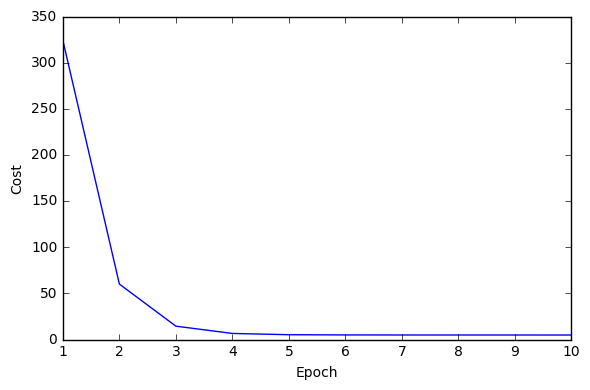

In [10]:
import matplotlib.pyplot as plt

costs, w = train_linreg(X_train, y_train, eta=0.001, epochs=10)

plt.plot(range(1, len(costs)+1), costs)
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.tight_layout()
plt.show()

In [11]:
def predict_linreg(X, w):
    Xt = T.matrix(name='X')
    net_input = T.dot(Xt, w[1:]) + w[0]
    predict = theano.function(inputs=[Xt], givens={w: w}, outputs=net_input)
    return predict(X)

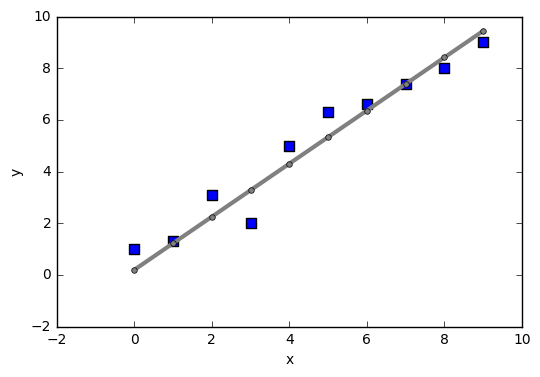

In [12]:
plt.scatter(X_train, y_train, marker='s', s=50)
plt.plot(range(X_train.shape[0]), predict_linreg(X_train, w),color='gray', marker='o', markersize=4,linewidth=3)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## 13.2

In [13]:
X = np.array([[1,1.4,1.5]])
w = np.array([0.0, 0.2, 0.4])
def net_input(X, w):
    z = X.dot(w)
    return z

def logistic(z):
    return 1.0 / (1.0 + np.exp(-z))

def logistic_activation(X, w):
    z = net_input(X, w)
    return logistic(z)

print('P(y=1|x) = %.3f' % logistic_activation(X, w)[0])


P(y=1|x) = 0.707


In [14]:
W = np.array([[1.1, 1.2, 1.3, 0.5],
             [0.1,0.2,0.4,0.1],
             [0.2,0.5,2.1,1.9]])

A = np.array([[1.0],
              [0.1],
              [0.3],
              [0.7]])

Z = W.dot(A)
y_probas = logistic(Z)
print('Prbablilities:\n', y_probas)
y_class = np.argmax(Z, axis=0)
print('predicted class label: %d' % y_class[0])


Prbablilities:
 [[ 0.87653295]
 [ 0.57688526]
 [ 0.90114393]]
predicted class label: 2


In [15]:
def softmax(z):
    return np.exp(z) / np.sum(np.exp(z))

def softmax_activation(X, w):
    z = net_input(X, w)
    return softmax(z)

y_probas = softmax(Z)
print('Probabilities:\n' , y_probas )
print('y_probas.sum:', y_probas.sum())
print('Z:\n',Z)

Probabilities:
 [[ 0.40386493]
 [ 0.07756222]
 [ 0.51857284]]
y_probas.sum: 1.0
Z:
 [[ 1.96]
 [ 0.31]
 [ 2.21]]


In [16]:
y_class = np.argmax(Z, axis=0)
print('predicted class label: %d' % y_class[0])

predicted class label: 2


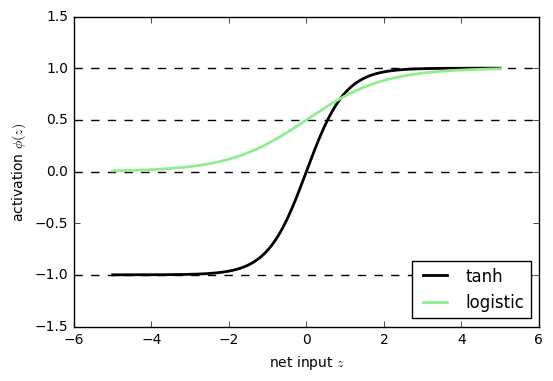

In [17]:
import matplotlib.pyplot as plt

def tanh(z):
    e_p = np.exp(z)
    e_m = np.exp(-z)
    return (e_p - e_m) / (e_p + e_m)

z = np.arange(-5, 5, 0.005)

log_act = logistic(z)
tanh_act = tanh(z)

plt.ylim([-1.5,1.5])
plt.xlabel('net input $z$')
plt.ylabel('activation $\phi(z)$')
plt.axhline(1, color='black', linestyle='--')
plt.axhline(0.5, color='black', linestyle='--')
plt.axhline(0, color='black', linestyle='--')
plt.axhline(-1, color='black', linestyle='--')
plt.plot(z, tanh_act, linewidth=2, color='black', label='tanh')
plt.plot(z, log_act, linewidth=2, color='lightgreen', label='logistic')
plt.legend(loc='lower right')
plt.show()